Name: Rutuja Anil Sawant
GRIP at the Sparks Foundation
Task 1
To predict the score of a student studying for 9.25 hours/day

In [4]:
# Importing all libraries required in this notebook
import warnings
warnings.filterwarnings('ignore')

# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# seaborn
import seaborn as sns

# Reading data from link
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link,header='infer')

In [5]:
##############################################################
# Exploratory Data Analytics
##############################################################

# columns
print("\n*** Columns ***")
print(data.columns)

# info
print("\n*** Structure ***")
print(data.info())

# summary
print("\n*** Summary ***")
print(data.describe())

# head
print("\n*** Head ***")
print(data.head())



*** Columns ***
Index(['Hours', 'Scores'], dtype='object')

*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

*** Summary ***
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

*** Head ***
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [7]:
depVars = "Scores"

In [8]:
##############################################################
# Model Creation & Fitting And Prediction for Feature 'rm'
##############################################################

# all cols except dep var
print("\n*** Regression Data ***")
allCols = data.columns.tolist()
print(allCols)
allCols.remove(depVars)
print(allCols)

# now create linear regression model
print("\n*** Regression Model ***")
X = data[allCols].values.reshape(-1,1)
y = data[depVars].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model)
model.fit(X,y)

# predict
p = model.predict(X)
data['predict'] = p


*** Regression Data ***
['Hours', 'Scores']
['Hours']

*** Regression Model ***
(25, 1)
(25,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
LinearRegression()



*** Scatter Plot ***


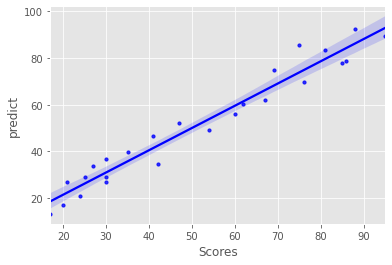


*** Mean Absolute Error ***
4.972805319866375

*** Mean Squared Error ***
28.88273050924546

*** Root Mean Squared Error ***
5.374265578592619

*** Mean ***
51.48
51.48

*** Scatter Index ***
0.1043952132593749


In [9]:
##############################################################
# Model Evaluation
##############################################################

# visualize 
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=data, x=depVars, y='predict', color='b', scatter_kws={"s": 10})
plt.show()

# mae 
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data[depVars], data['predict'])
print(mae)

# mse
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data[depVars], data['predict'])
print(mse)
   
# rmse 
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)

# check mean
print('\n*** Mean ***')
print(data[depVars].mean())
print(data['predict'].mean())


# scatter index (SI) is defined to judge whether RMSE is good or not. 
# SI=RMSE/measured data mean. 
# If SI is less than one, your estimations are acceptable.
print('\n*** Scatter Index ***')
si = rmse/data[depVars].mean()
print(si)

In [12]:
#To predict the score of a student studying for 9.25 hours/day
prd_X = np.array(9.25)
prd_X = prd_X.reshape(-1,1)
print(prd_X.flatten())

prd_p = model.predict(prd_X)
print(prd_p)
print("Predicted score if student studies for 9.25hrs/day is = ", prd_p)

[9.25]
[92.90985477]
Predicted score if student studies for 9.25hrs/day is =  [92.90985477]
